<a href="https://colab.research.google.com/github/cerenbulbul/ObjectDetection/blob/master/projeImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Proccesing Project**

In [0]:
# importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
from image import *
import json
from matplotlib import cm as CM
from image import *
from imutils import paths
import torchvision.models as models
import torch
import cv2
from tqdm import tqdm
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls '/content/gdrive/My Drive/Proje/DataSet/'

Test  Train  Value


In [0]:
############ TAKE TRAIN FILE ##################

DATADIR = '/content/gdrive/My Drive/Proje/DataSet/Train/';

CATEGORIES = {'People': 0, 'Old': 1, 'Child': 2}

target_size = (224, 224)
batch_size = 32

x_train = []
y_train = []

people_train = []
old_train = []
child_train = []

for CATEGORY in CATEGORIES:
    path = DATADIR + CATEGORY
    full_dataset_imagePaths = sorted(list(paths.list_images(str(path))))
    
    print(" ")
    print(CATEGORY)

    for i in tqdm(range(len(full_dataset_imagePaths))):
        imagePath = full_dataset_imagePaths[i]

        img = cv2.imread(imagePath)
        img = cv2.resize(img, target_size)
        x_train.append(img)


        if CATEGORY == 'People':
            people_train.append(img)
        elif CATEGORY == 'Old':
            old_train.append(img)
        elif CATEGORY == 'Child':
            child_train.append(img)

            
        CATEGORY = imagePath.split(os.path.sep)[-2]
        y_train.append(CATEGORIES[CATEGORY])

print("len x_train: ", len(x_train))
print("shape", x_train[0].shape)
print("len y_train: ", len(y_train))


 16%|█▌        | 11/70 [00:00<00:00, 105.67it/s]

 
People


  9%|▉         | 6/68 [00:00<00:01, 56.21it/s]

 
Old


  9%|▉         | 7/75 [00:00<00:00, 68.33it/s]

 
Child


100%|██████████| 75/75 [00:00<00:00, 119.48it/s]

len x_train:  213
shape (224, 224, 3)
len y_train:  213


In [0]:
############ TAKE TEST FILE ##################

DATADIR = '/content/gdrive/My Drive/Proje/DataSet/Test/';

CATEGORIES = {'people': 0, 'Old': 1, 'Child': 2}

target_size = (224, 224)

x_test = []
y_test = []

people_test = []
old_test = []
child_test = []

for CATEGORY in CATEGORIES:
    path = DATADIR + CATEGORY
    full_dataset_imagePaths = sorted(list(paths.list_images(str(path))))
    
    print(" ")
    print(CATEGORY)

    for i in tqdm(range(len(full_dataset_imagePaths))):
        imagePath = full_dataset_imagePaths[i]

        img = cv2.imread(imagePath)
        img = cv2.resize(img, target_size)
        x_test.append(img)

        

        if CATEGORY == 'people':
            people_test.append(img)
        elif CATEGORY == 'Old':
            old_test.append(img)
        elif CATEGORY == 'Child':
            child_test.append(img)

        CATEGORY = imagePath.split(os.path.sep)[-2]
        y_test.append(CATEGORIES[CATEGORY])

print("len x_train: ", len(x_test))
print("shape", x_test[0].shape)
print("len y_train: ", len(y_test))

print(len(x_train))
print(len(y_train))

print(len(x_test))
print(len(y_test))


 60%|██████    | 12/20 [00:00<00:00, 113.81it/s]

 
people


  0%|          | 0/22 [00:00<?, ?it/s]

 
Old


 25%|██▌       | 7/28 [00:00<00:00, 68.46it/s]

 
Child


100%|██████████| 28/28 [00:00<00:00, 78.10it/s]

len x_train:  70
shape (224, 224, 3)
len y_train:  70
213
213
70
70


213
213
70
70


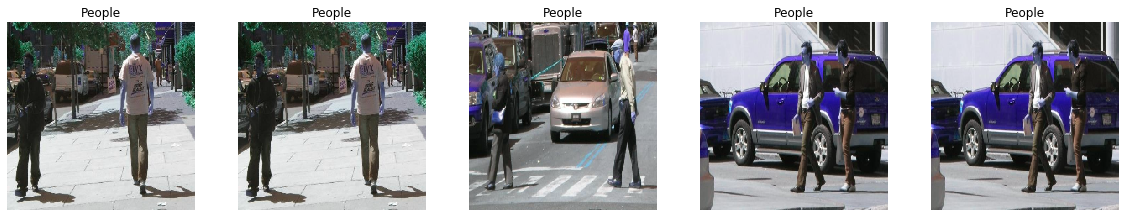

213
213
70
70


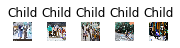

In [0]:
######################## SHOW ######################
import random

plt.figure(figsize=(20, 20))

prefictionNum = 5
print(len(x_train))
print(len(y_train))

print(len(x_test))
print(len(y_test))


for i in range(prefictionNum):
    index = random.randint(0, len(people_test) - 1)
    image = people_test[index]
    data = np.expand_dims(image, axis=0)

    plt.subplot(5, 5, i + 1)
    plt.title("People")
    plt.imshow(image)
    plt.axis('off')

plt.show()

for i in range(prefictionNum):
    if len(child_test) > 0:
        index = random.randint(0, len(child_test) - 1)
        image = child_test[index]
        data = np.expand_dims(image, axis=0)

        plt.subplot(10, 10, i + 1)
        plt.title("Child")
        plt.imshow(image)
        plt.axis('off')

print(len(x_train))
print(len(y_train))

print(len(x_test))
print(len(y_test))

#plt.show()

In [0]:
from sklearn.utils import shuffle

x_train = np.array(x_train)
x_test = np.array(x_test)

y_train= np.array(y_train)
y_test= np.array(y_test)

x_train= x_train/255
x_test= x_test/255

x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

print(len(x_train))
print(len(y_train))

print(len(x_test))
print(len(y_test))

213
213
70
70


In [0]:
## Data Argument
from keras.preprocessing.image import ImageDataGenerator
import time

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [0]:
import keras
from keras import backend as K

batch_size = 32
num_classes = 3 
epochs = 50 
img_rows, img_cols = 224, 224

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(-1, 3, img_rows, img_cols)
    x_test = x_test.reshape(-1, 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(-1, img_rows, img_cols, 3)
    x_test = x_test.reshape(-1, img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)
    
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(len(x_train))
print(len(y_train))

print(len(x_test))
print(len(y_test))

213
213
70
70


In [0]:
##Öğrenmeme Durumunda Erken Durdurma
from keras.callbacks import EarlyStopping, ModelCheckpoint,History

callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [0]:
!pip install tensorflow version 3.6 

  Using cached https://files.pythonhosted.org/packages/fd/b6/fa3b2c859d4d8817a106e4272029d78a2afbca0a27139997a4e5515bbf60/version-0.1.1.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [0]:
#Model
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D, ZeroPadding2D,Convolution2D,GlobalAveragePooling2D
from keras import backend as K
from keras.optimizers import SGD
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet import MobileNet
from keras.callbacks import EarlyStopping, ModelCheckpoint,History

import tensorflow as tf
run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)
from keras import models
from sklearn.utils import shuffle

from keras.preprocessing.image import ImageDataGenerator
import time

#Model
model = MobileNet(weights='imagenet',include_top=False)

x = GlobalAveragePooling2D(input_shape=model.output_shape[1:])(model.output)
x = Dense(3, activation='softmax', kernel_initializer='glorot_normal')(x)
model = models.Model(inputs=model.input, outputs=x)


# fine tune training for top layers
for layer in model.layers[:-1]:#[n_frozen_layers:]:
    layer.trainable=True


'''
    #VGG16 model
    model = VGG16(weights='imagenet', include_top=False)

    #ResNet Model
    model = ResNet50(weights='imagenet',include_top=False, input_shape=(224, 224, 3),classes = 3)

    #MobileNet model
    model = MobileNet(weights='imagenet',include_top=False)

    #CSRNet model (While we were doing this part, we searched the internet and found such a line of code.)
    model = CSRNet()
    #defining the model
    model = model.cuda()

    #RCNN Model (While we were doing this part, we searched the internet and found such a line of code.)
    # Create model object in inference mode.
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

    # Load weights trained on MS-COCO
    model.load_weights(COCO_MODEL_PATH, by_name=True)

    
'''


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


'\n    #VGG16 model\n    model = VGG16(weights=\'imagenet\', include_top=False)\n\n    #ResNet Model\n    model = ResNet50(weights=\'imagenet\',include_top=False, input_shape=(224, 224, 3),classes = 3)\n\n    #MobileNet model\n    model = MobileNet(weights=\'imagenet\',include_top=False)\n\n    #CSRNet model (While we were doing this part, we searched the internet and found such a line of code.)\n    model = CSRNet()\n    #defining the model\n    model = model.cuda()\n\n    #RCNN Model (While we were doing this part, we searched the internet and found such a line of code.)\n    # Create model object in inference mode.\n    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)\n\n    # Load weights trained on MS-COCO\n    model.load_weights(COCO_MODEL_PATH, by_name=True)\n\n    \n'

In [0]:
model.compile(optimizer=SGD(lr=1e-4, momentum=0.9, nesterov=True),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128

In [0]:
history = model.fit_generator(datagen.flow(x_test, y_test,
                                          batch_size=batch_size),
                                          validation_data=(x_test , y_test),
                                          steps_per_epoch=len(x_train) // batch_size,
                                          epochs=epochs)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


6/6 [==============================] - 24s 4s/step - loss: 1.4026 - acc: 0.3242 - val_loss: 1.3698 - val_acc: 0.3429
Epoch 2/50
6/6 [==============================] - 1s 224ms/step - loss: 1.2970 - acc: 0.3239 - val_loss: 1.2220 - val_acc: 0.4143
Epoch 3/50
6/6 [==============================] - 2s 315ms/step - loss: 1.1418 - acc: 0.3981 - val_loss: 1.0837 - val_acc: 0.5143
Epoch 4/50
6/6 [==============================] - 2s 311ms/step - loss: 1.0084 - acc: 0.4449 - val_loss: 0.9735 - val_acc: 0.5714
Epoch 5/50
6/6 [==============================] - 2s 284ms/step - loss: 0.8363 - acc: 0.6290 - val_loss: 0.8846 - val_acc: 0.6286
Epoch 6/50
6/6 [==============================] - 2s 281ms/step - loss: 0.8694 - acc: 0.5794 - val_loss: 0.8017 - val_acc: 0.7000
Epoch 7/50
6/6 [==============================] - 2s 271ms/step - loss: 0.7143 - acc: 0.7171 - val_loss: 0.7348 - val_acc: 0.7429
Epoch 8/50
6/6 [==============================] - 2s 274ms/step - loss: 0.6980 - acc: 0.7252 - val_loss

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Test Loss: 0.09545742124319076
Test Accuracy:  1.0
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


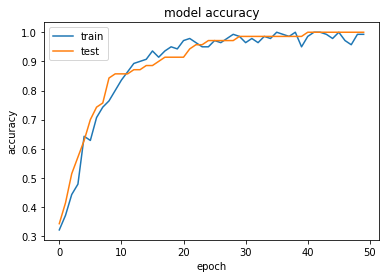

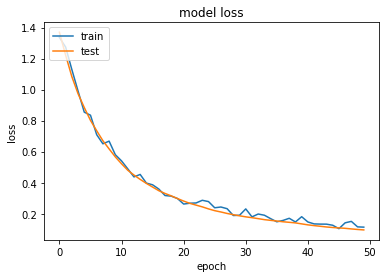

In [0]:
##SONUCLARIN GORSELLESTIRILMESI 

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy: ' , score[1])

print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#Get csv
import pandas as pd
df_human = pd.read_csv("human_analysis.csv")
df_human.shape

human_top = df_human[df_human['Number'] > 100].reset_index()
human_top = human_top[['Section', 'Number']]
maxValue = max(df_human.Number)
size = len(df_human.Number)
weights= maxValue/size

print(weights)
print(df_human)

31.333333333333332
  Section  Number  class_weights
0  People      94              1
1     Old      70              1
2   Child      82              1


In [0]:
len(df_human)

3

In [0]:
class_weight = df_human.class_weights.to_dict()
class_weight

{0: 1, 1: 1, 2: 1}

In [0]:
!ls '/content/gdrive/My Drive/Proje/DataSet/Train/'
images_dir = '/content/gdrive/My Drive/Proje/DataSet/Train/'

artists_dirs = os.listdir(images_dir)
print(df_human.Section)

for name in df_human.Section:
    if os.path.exists(os.path.join(images_dir, name)):
        print("Found -->", os.path.join(images_dir, name))
    else:
        print("Did not find -->", os.path.join(images_dir, name))

Child  Old  People
0    People
1       Old
2     Child
Name: Section, dtype: object
Found --> /content/gdrive/My Drive/Proje/DataSet/Train/People
Found --> /content/gdrive/My Drive/Proje/DataSet/Train/Old
Found --> /content/gdrive/My Drive/Proje/DataSet/Train/Child


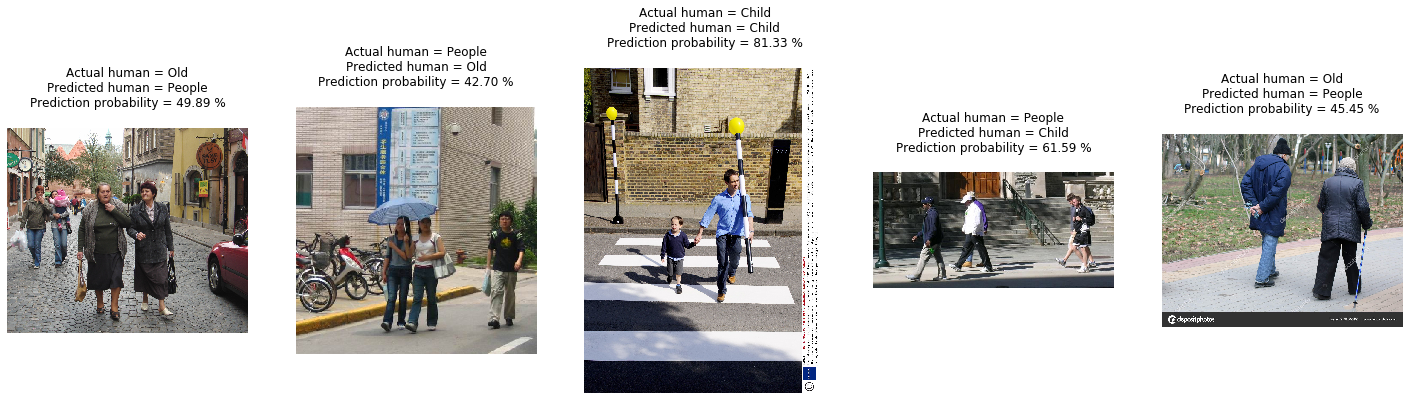

In [0]:
# Prediction
from keras.preprocessing import *

n = 5
fig, axes = plt.subplots(1, n, figsize=(25,10))
train_input_shape = (224,224,3)

for i in range(n):
    random_ = random.choice(df_human.Section)
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_)))
    random_image_file = os.path.join(images_dir, random_, random_image)

    # Original image
    test_image = image.load_img(random_image_file, target_size=(train_input_shape[0:2]))

    # Predict 
    test_image = image.img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis=0)

    prediction = model.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)



    title = "Actual human = {}\nPredicted human = {}\nPrediction probability = {:.2f} %\n" \
                .format(random_.replace('_', ' '), df_human.Section[prediction_idx], prediction_probability*100)

    # Print image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

In [0]:
'''
#COUNTING PEOPLE IN AN IMAGE 
# While we were doing this part, we searched the internet and found such a line of code. This code counts the number of people in an image.

# Imports
import tensorflow as tf

# Object detection imports
from utils import backbone
from api import object_counting_api

input_image = "./input_images_and_videos/sample_input_image.jpg"


detection_graph, category_index = backbone.set_model('ssd_mobilenet_v1_coco_2018_01_28', 'mscoco_label_map.pbtxt')

is_color_recognition_enabled = 0

result = object_counting_api.single_image_object_counting(input_video, detection_graph, category_index, is_color_recognition_enabled) # targeted objects counting

print (result)

'''

'\n#COUNTING PEOPLE IN AN IMAGE \n# While we were doing this part, we searched the internet and found such a line of code. This code counts the number of people in an image.\n\n# Imports\nimport tensorflow as tf\n\n# Object detection imports\nfrom utils import backbone\nfrom api import object_counting_api\n\ninput_image = "./input_images_and_videos/sample_input_image.jpg"\n\n\ndetection_graph, category_index = backbone.set_model(\'ssd_mobilenet_v1_coco_2018_01_28\', \'mscoco_label_map.pbtxt\')\n\nis_color_recognition_enabled = 0\n\nresult = object_counting_api.single_image_object_counting(input_video, detection_graph, category_index, is_color_recognition_enabled) # targeted objects counting\n\nprint (result)\n\n'